<a href="https://colab.research.google.com/github/Viksilio/DA_plus/blob/master/EDA_WorkShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Исследование поведения студентов в чате

### Описание проекта

Проанализируйте поведение студентов в чатах, выявите паттерны, динамику, цикличность, визуализируйте свои находки и помоги понять, когда активность студентов в чатах наибольшая и когда лучше публиковать анонсы, подобные данному, чтобы получить побольше откликов.

Также проанализируйте различные типы каналов, в каких общения больше, в каких меньше и как они различаются от когорты к когорте. И для тех, кому этого всего мало и кто быстро справится, задание сегментировать или кластеризировать самих пользователей и постараться выявить различия между кластерами и сегментами.

### Цель проекта
Проанализировать активность в чатах Пачки и Слак

### Проблема 
Низкая обратная связь на важные посты, публикуемые в чатах

### Задачи:
 - проанализировать поведение студентов в чатах;
 - выявить паттерны, динамику, цикличность в течение дня, недели, месяца, года;
 - визуализировать свои находки;
 - помочь нам понять, когда активность студентов в чатах наибольшая, и когда лучше публиковать посты/анонсы, чтобы получить больше откликов;
 - проанализировать различные типы каналов, когорт, групп;
 - оценить в каких общения больше, в каких меньше, и как они различаются от когорты к когорте, от канала к каналу. 

## Описание данных 

- Unnamed: 0 - индекс (можно удалить)
- client_msg_id - id сообщения 
- type - тип поста 
- user - id пользователя 
- ts - дата поста
- thread_ts - дата треда
- latest_reply - дата ответа
- team - факт вхождения в неизвестную группу (?) 
- subtype - метка действий пользователя 
- channel - канал 
- file_date - дата файла 
- attachments - прикреплённые файлы  
- reactions - реакции 
- text_len - длина текста сообщения  
- text_words - количество слов в сообщении

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import ast
import plotly.express as px
from datetime import datetime, timedelta, date
#from collections import Sequence, Mapping
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('darkgrid') 

In [ ]:
try: 
  data = pd.read_csv('chat_data_clean.csv', index_col=0)
except:
  data = pd.read_csv('/content/drive/MyDrive/chat_data_clean.csv', index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26533 entries, 0 to 26532
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   client_msg_id  18262 non-null  object 
 1   type           26533 non-null  object 
 2   user           23643 non-null  object 
 3   ts             26533 non-null  float64
 4   latest_reply   2303 non-null   float64
 5   team           15857 non-null  object 
 6   thread_ts      18222 non-null  float64
 7   subtype        8317 non-null   object 
 8   channel        26533 non-null  object 
 9   file_date      26533 non-null  object 
 10  attachments    26533 non-null  int64  
 11  reactions      4169 non-null   object 
 12  text_len       26533 non-null  int64  
 13  text_words     26533 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 3.0+ MB


In [ ]:
data.head()

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,1669643363.45,1669645448.32,TPV9DP0N4,1669643363.45,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,1669645448.32,NaN,TPV9DP0N4,1669643363.45,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,1669646930.33,NaN,NaN,NaN,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,1669709292.16,1669719417.16,NaN,1669709292.16,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,1669710752.08,NaN,TPV9DP0N4,1669709292.16,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2


## Предобработка данных

### Удаление столбцов не участвующих в анализе

In [ ]:
data = data.drop(['type'], axis=1)

### Просмотр уникальных значений столбцов

In [ ]:
data['user'].unique()

array(['U03JYMWQLP5', 'U03V483FRKM', 'U02KVQJHQ5S', ..., 'U045ZBAM1JA',
       'U044T2TLGH3', 'U04152HKDHN'], dtype=object)

In [ ]:
data['subtype'].unique()

array([nan, 'channel_join', 'bot_remove', 'thread_broadcast',
       'channel_unarchive', 'channel_leave', 'bot_message',
       'channel_purpose', 'tombstone', 'channel_name'], dtype=object)

In [ ]:
data['channel'].unique()

array(['data-analysts-bus', 'datatracker_logs', 'data_complaints',
       'data_edteam_info', 'da_42_exerciser_1', 'da_42_exerciser_2',
       'da_42_projects_1', 'da_42_projects_2', 'da_50_info',
       'da_50_library', 'da_50_teamwork', 'da_52_exerciser', 'da_52_info',
       'da_52_library', 'da_52_projects', 'da_52_teamwork',
       'da_53_exerciser_1', 'da_53_exerciser_2', 'da_53_info',
       'da_53_library', 'da_53_projects_1', 'da_53_projects_2',
       'da_53_teamwork', 'da_54_exerciser_01', 'da_54_exerciser_02',
       'da_54_info', 'da_54_library', 'da_54_projects_01',
       'da_54_projects_02', 'da_54_teamwork', 'da_55_exerciser',
       'da_55_info', 'da_55_library', 'da_55_projects', 'da_55_teamwork',
       'da_56b_exerciser', 'da_56b_info', 'da_56b_library',
       'da_56b_projects', 'da_56b_teamwork', 'da_56_exerciser_1',
       'da_56_exerciser_2', 'da_56_info', 'da_56_library',
       'da_56_projects_1', 'da_56_projects_2', 'da_56_teamwork',
       'da_58_digitalpro

In [ ]:
data['reactions'].unique()

array([nan, "[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U040E2D6CF2'], 'count': 1}]",
       ..., "[{'name': 'pray', 'users': ['U03RSC0RSBU'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U02QK4VR38F'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U044T2TLGH3'], 'count': 1}]"],
      dtype=object)

### Преобразование формата данных столбцов

In [ ]:
data['ts'] = pd.to_datetime(data['ts'], unit='s').dt.round('1s')
data['thread_ts'] = pd.to_datetime(data['thread_ts'], unit='s').dt.round('1s')
data['latest_reply'] = pd.to_datetime(data['latest_reply'], unit='s').dt.round('1s')
data['file_date'] = pd.to_datetime(data['file_date'])

### Поиск и отсечение выбросов

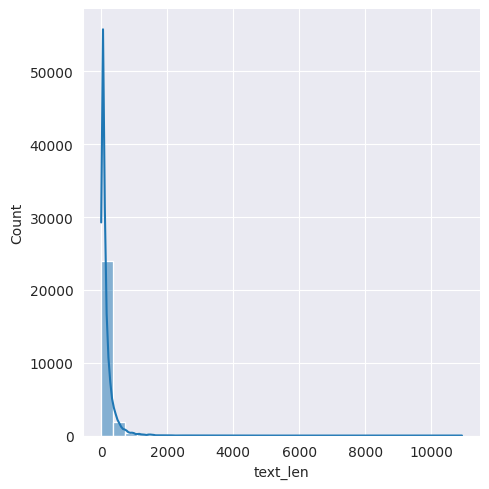

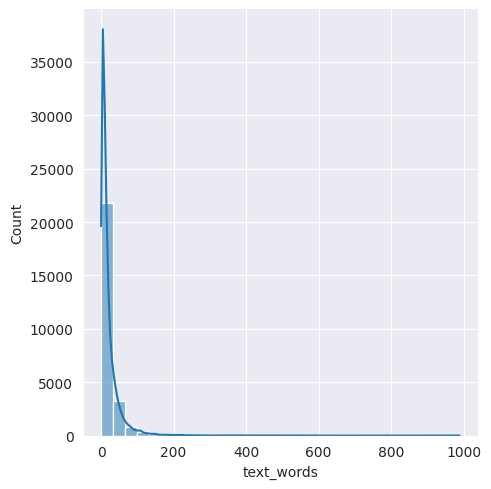

In [ ]:
for col in ['text_len', 'text_words']:
    sns.displot(data[col], bins=30, kde=True)

In [ ]:
data = data[(data['text_len'] <= 1000)]

In [ ]:
data = data[(data['text_words'] <= 150)]

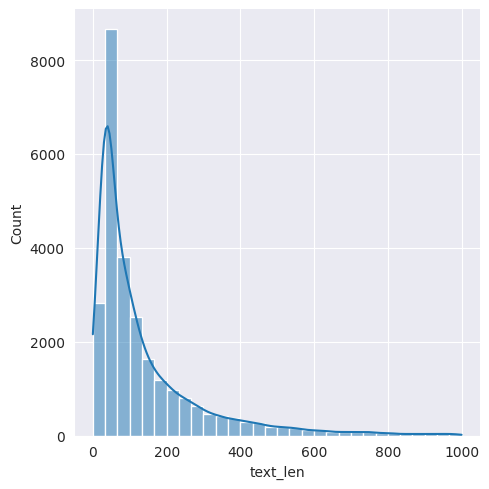

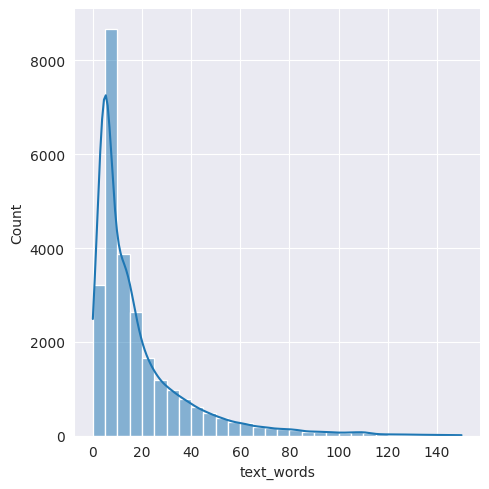

In [ ]:
for col in ['text_len', 'text_words']:
    sns.displot(data[col], bins=30, kde=True)

### Очистка данных от системных сообщений

In [ ]:
data['subtype'] = data['subtype'].fillna(0)

In [ ]:
data = data[(data['subtype'] == 0)]

In [ ]:
data = data.drop(['subtype'], axis=1)

### Создание нового столбца с названием когорт

In [ ]:
# Функция для определения названия когорты
def cohort_name(row):
    match = re.search(r'_(\d+|\d+b)_', str(row['channel']))
    if match:
        return match.group(1)

In [ ]:
data['cohort_name'] = data.apply(cohort_name, axis=1)
data['cohort_name'] = data['cohort_name'].fillna('Нет')

### Создание нового столбца с тематикой канала

In [ ]:
# Функция для определения тематики канала
def find_and_add_keywords(column_name):
    keywords = ['library', 'info', 'teamwork', 'projects', 'exerciser', 'community', 'students_feedback', 
                'mentors', 'digital_professions', 'group_red', 'group_green', 'group_purple', 'цифровые-профессии', 
                'apps', 'final_info', 'tutorial', 'group_orange', 'masterskaya']
    for keyword in keywords:
      if keyword in column_name:
         return keyword

In [ ]:
data['channel_theme'] = data['channel'].apply(find_and_add_keywords)

### Создание нового столбца с количество реакций

In [ ]:
# Функция для подсчета количество реакций на сообщении
def extract_count(x):
    if pd.isna(x):
        return 0
    try:
        x = ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return 0
    count_sum = sum([d['count'] for d in x if isinstance(d, dict) and 'count' in d])
    return count_sum

In [ ]:
data['reactions_count'] = data['reactions'].apply(extract_count)

### Проверка данных на явные дубликаты

In [ ]:
data.duplicated().sum()

0

### Итоговый датафрейм для анализа после предобработки данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17870 entries, 0 to 26530
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client_msg_id    17808 non-null  object        
 1   user             17870 non-null  object        
 2   ts               17870 non-null  datetime64[ns]
 3   latest_reply     1277 non-null   datetime64[ns]
 4   team             15462 non-null  object        
 5   thread_ts        16901 non-null  datetime64[ns]
 6   channel          17870 non-null  object        
 7   file_date        17870 non-null  datetime64[ns]
 8   attachments      17870 non-null  int64         
 9   reactions        3929 non-null   object        
 10  text_len         17870 non-null  int64         
 11  text_words       17870 non-null  int64         
 12  cohort_name      17870 non-null  object        
 13  channel_theme    16476 non-null  object        
 14  reactions_count  17870 non-null  int64

In [ ]:
data.tail(10)

,client_msg_id,user,ts,latest_reply,team,thread_ts,channel,file_date,attachments,reactions,text_len,text_words,cohort_name,channel_theme,reactions_count
26518,bb4d5d49-aefd-484f-ad57-ecebaf3d701f,U040YGJ4VMK,2022-12-02 13:20:08,NaT,TPV9DP0N4,2022-12-02 13:08:29,sql_teamwork_03,2022-12-02,0,"[{'name': 'cat-high-five', 'users': ['U02QK4VR...",77,10,Нет,teamwork,1
26519,eb82ff79-5381-493a-89d3-77abc4192d2c,U043THJENBZ,2022-12-03 12:15:05,2022-12-03 18:07:05,NaN,2022-12-03 12:15:05,sql_teamwork_03,2022-12-03,0,NaN,80,11,Нет,teamwork,0
26520,d96b63b3-f677-4cb5-acf8-be7a47356bd3,U042GJ00EB0,2022-12-03 12:25:21,NaT,NaN,NaT,sql_teamwork_03,2022-12-03,0,NaN,35,6,Нет,teamwork,0
26521,d3a1c647-f815-4d7e-bbee-c5ebbb6e3c4d,U045ZBAM1JA,2022-12-03 18:07:05,NaT,TPV9DP0N4,2022-12-03 12:15:05,sql_teamwork_03,2022-12-03,0,NaN,45,6,Нет,teamwork,0
26522,e2d35d98-cacf-4620-a236-693734c84c06,U044T2TLGH3,2022-12-07 02:01:54,2022-12-07 08:32:05,NaN,2022-12-07 02:01:54,sql_teamwork_03,2022-12-06,0,NaN,72,11,Нет,teamwork,0
26523,c16d32c0-0f5e-48bf-9aec-1751f7c02674,U02JSUUMARF,2022-12-07 08:02:01,NaT,TPV9DP0N4,2022-12-07 02:01:54,sql_teamwork_03,2022-12-07,0,NaN,71,11,Нет,teamwork,0
26524,9224f67b-ce71-4ea2-adcb-f47862895977,U04152HKDHN,2022-12-07 08:32:05,NaT,TPV9DP0N4,2022-12-07 02:01:54,sql_teamwork_03,2022-12-07,0,"[{'name': 'cat-high-five', 'users': ['U044T2TL...",41,8,Нет,teamwork,1
26525,ac150123-309f-40ae-a787-f647ab4a76d9,U045ZBAM1JA,2022-12-08 16:11:28,NaT,NaN,NaT,sql_teamwork_03,2022-12-08,0,NaN,80,13,Нет,teamwork,0
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,sql_teamwork_new,2022-12-08,0,NaN,340,53,Нет,teamwork,0
26530,b403e184-0a77-42ff-96ee-8813a06c387e,U036P42C39Q,2022-12-09 16:57:37,NaT,TPV9DP0N4,NaT,sql_teamwork_new,2022-12-09,0,NaN,110,5,Нет,teamwork,0


## Анализ данных

### План анализа:

- [x] В какой тематике больше/меньше всего сообщений?  
- [x] В какой когорте больше/меньше всего сообщений?  
- [x] В сообщениях какой тематики канала больше/меньше всего реакций?  
- [x] В сообщениях какой когорты больше/меньше всего реакций? 
- [x] Корреляции длины текста, количества слов, количества реакций и добавленных файлов 
- [x] Где быстрее всего отвечают? В какой когорте, теме  
- [x] В какой день недели пользователи отвечают чаще?
- [x] Самый активный участник
- [x] Медианное и среднее значения сообщений и реакций пользователей
- [x] Сегментирование пользователей по их активности

### Определение наиболее/наименее активной тематики групп

In [ ]:
theme_msg = data.pivot_table(index='channel_theme', values='client_msg_id', aggfunc=('count')).reset_index()
theme_msg.columns=['channel_theme', 'count_msg']
theme_msg = theme_msg.sort_values('count_msg', ascending=False)

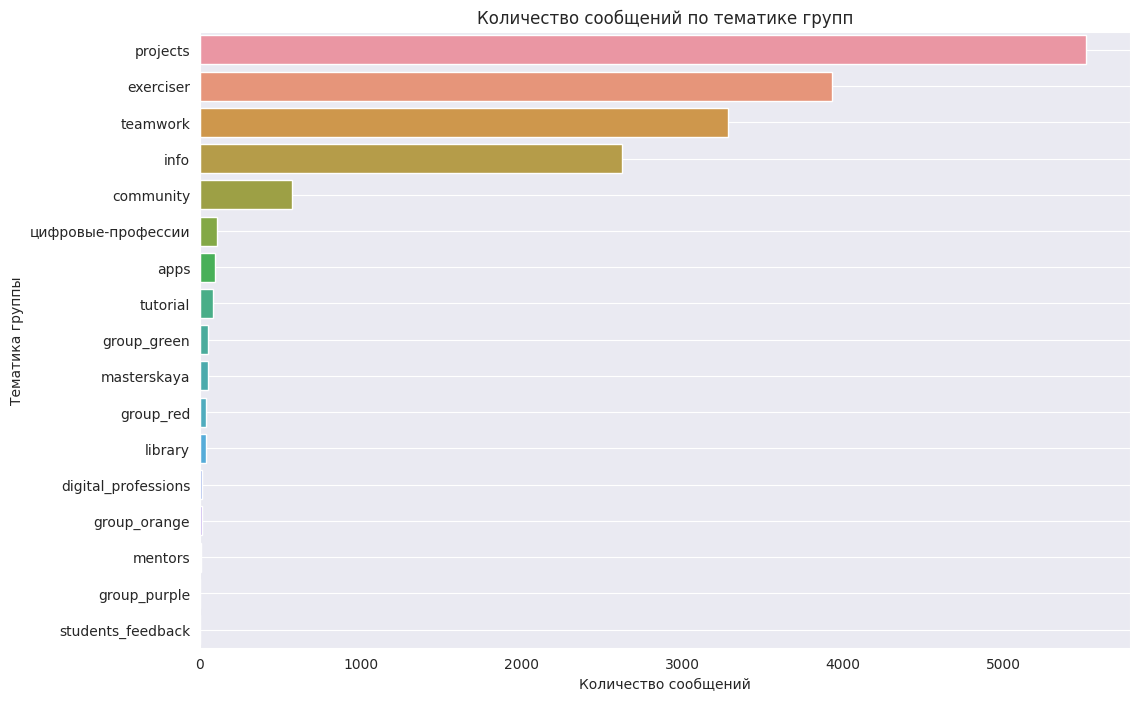

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='count_msg', y='channel_theme', data=theme_msg)
plt.title('Количество сообщений по тематике групп')
plt.xlabel('Количество сообщений')
plt.ylabel('Тематика группы')
plt.grid()
plt.show()

In [ ]:
print('Тематика канала с наибольшим количеством сообщений:', theme_msg['channel_theme'].head(1).values[0])

Тематика канала с наибольшим количеством сообщений: projects


In [ ]:
print('Тематика канала с наименьшим количеством сообщений:', theme_msg['channel_theme'].tail(1).values[0])

Тематика канала с наименьшим количеством сообщений: students_feedback


### Определение наибольшей/наименьшей активности среди когорт

In [ ]:
cohort_msg = data.pivot_table(index='cohort_name', values='client_msg_id', aggfunc=('count')).reset_index()
cohort_msg.columns=['cohort_name', 'count_msg']
cohort_msg = cohort_msg.sort_values('count_msg', ascending=False)

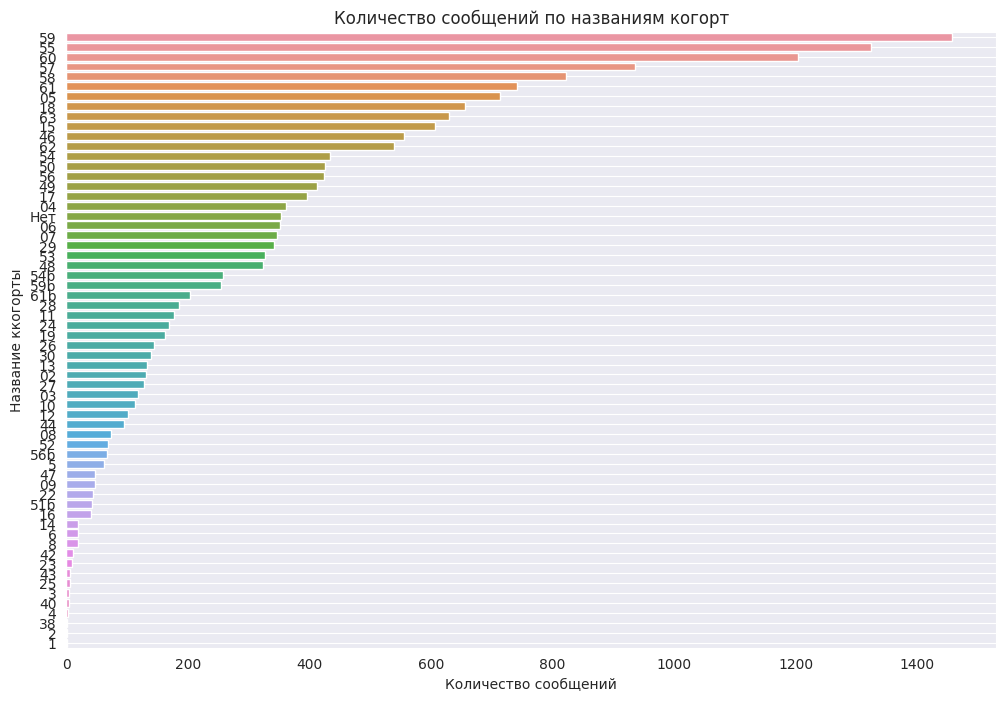

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='count_msg', y='cohort_name', data=cohort_msg)
plt.title('Количество сообщений по названиям когорт')
plt.xlabel('Количество сообщений')
plt.ylabel('Название ккогорты')
plt.grid()
plt.show()

In [ ]:
print('Когорта канала с наибольшим количеством сообщений:', cohort_msg['cohort_name'].head(1).values[0])

Когорта канала с наибольшим количеством сообщений: 59


In [ ]:
print('Когорта с наименьшим количеством сообщений:', cohort_msg['cohort_name'].tail(1).values[0])

Когорта с наименьшим количеством сообщений: 1


### В сообщениях какой тематики больше/меньше всего реакций?

In [ ]:
theme_reaction = data.pivot_table(index='channel_theme', values='reactions_count', aggfunc=('sum')).reset_index()
theme_reaction.columns=['channel_theme', 'sum_reaction']
theme_reaction = theme_reaction.sort_values('sum_reaction', ascending=False)

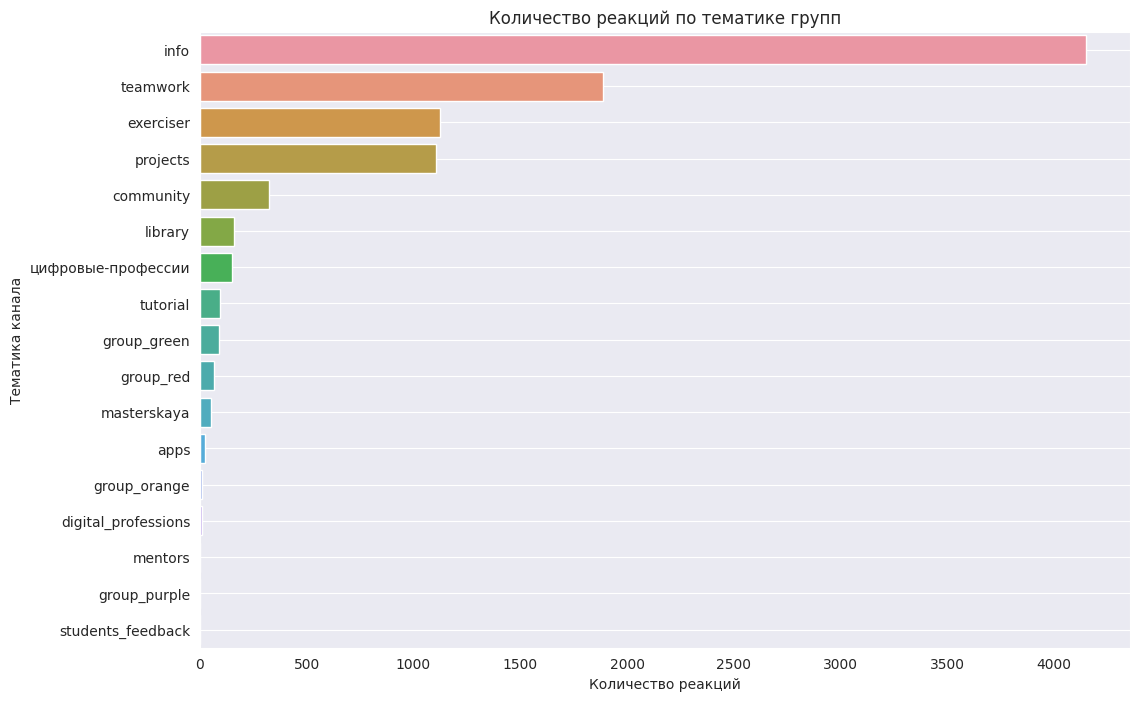

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='sum_reaction', y='channel_theme', data=theme_reaction)
plt.title('Количество реакций по тематике групп')
plt.xlabel('Количество реакций')
plt.ylabel('Тематика канала')
plt.grid()
plt.show()

In [ ]:
print('Тематика канала с наибольшим количеством реакций:', theme_reaction['channel_theme'].head(1).values[0])

Тематика канала с наибольшим количеством реакций: info


In [ ]:
print('Тематика канала с наименьшим количеством реакций:', theme_reaction['channel_theme'].tail(1).values[0])

Тематика канала с наименьшим количеством реакций: students_feedback


### В сообщениях каких когорт больше/меньше всего реакций?

In [ ]:
cohort_reaction = data.pivot_table(index='cohort_name', values='reactions_count', aggfunc=('sum')).reset_index()
cohort_reaction.columns=['cohort_name', 'sum_reaction']
cohort_reaction = cohort_reaction.sort_values('sum_reaction', ascending=False)

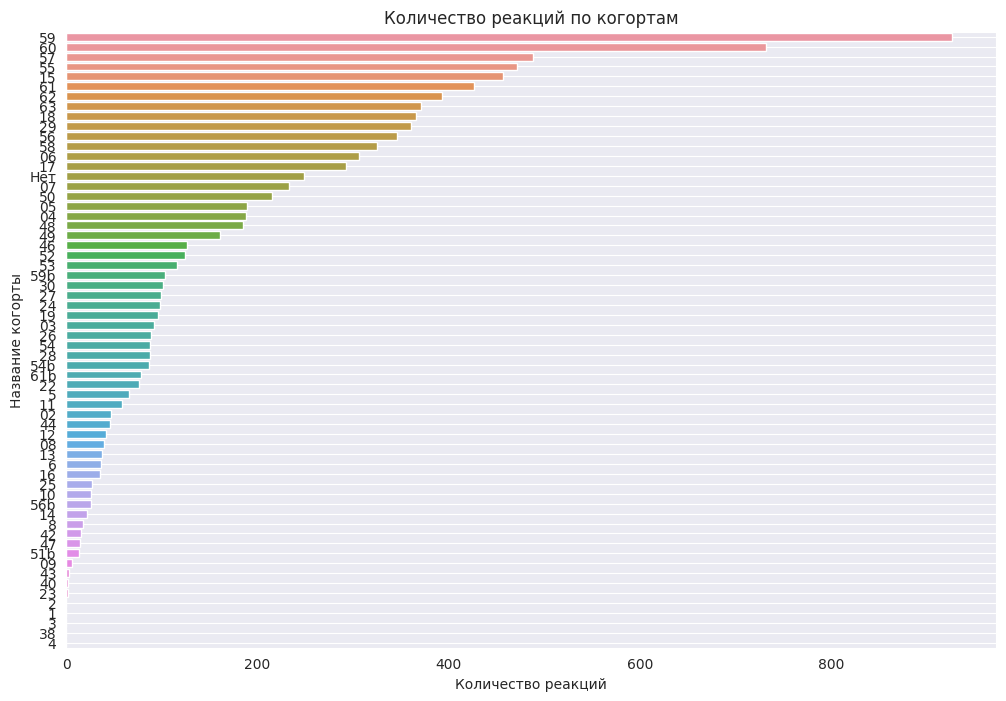

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='sum_reaction', y='cohort_name', data=cohort_reaction)
plt.title('Количество реакций по когортам')
plt.xlabel('Количество реакций')
plt.ylabel('Название когорты')
plt.grid()
plt.show()

In [ ]:
print('Название когорты с наибольшим количеством реакций:', cohort_reaction['cohort_name'].head(1).values[0])

Название когорты с наибольшим количеством реакций: 59


In [ ]:
print('Название когорты с наименьшим количеством реакций:', cohort_reaction['cohort_name'].tail(5).values)

Название когорты с наименьшим количеством реакций: ['2' '1' '3' '38' '4']


### Корреляции длины текста, количества слов, количества реакций и добавленных файлов

In [ ]:
text_words_len_corr = data.pivot_table(index='text_len', values='text_words').reset_index()
text_words_len_corr.corr()

,text_len,text_words
text_len,1.00,0.96
text_words,0.96,1.00


In [ ]:
text_len_react_corr = data.pivot_table(index='text_len', values='reactions_count').reset_index()
text_len_react_corr.corr()

,text_len,reactions_count
text_len,1.00,0.20
reactions_count,0.20,1.00


In [ ]:
text_words_react_corr = data.pivot_table(index='text_words', values='reactions_count').reset_index()
text_words_react_corr.corr()

,text_words,reactions_count
text_words,1.00,0.47
reactions_count,0.47,1.00


In [ ]:
att_react_corr = data.pivot_table(index='attachments', values='reactions_count').reset_index()
att_react_corr.corr()

,attachments,reactions_count
attachments,1.00,-0.01
reactions_count,-0.01,1.00


In [ ]:
att_react_corr = data.pivot_table(index='attachments', values='text_words').reset_index()
att_react_corr.corr()

,attachments,text_words
attachments,1.00,0.25
text_words,0.25,1.00


In [ ]:
att_react_corr = data.pivot_table(index='attachments', values='text_len').reset_index()
att_react_corr.corr()

,attachments,text_len
attachments,1.00,0.68
text_len,0.68,1.00


### Где быстрее/дольше всего отвечают? В какой когорте, теме.

In [ ]:
data['reply_time'] = data['latest_reply'] - data['ts']

In [ ]:
theme_reply_time = data.pivot_table(index='channel_theme', values='reply_time').reset_index()
theme_reply_time.columns=['channel_theme', 'reply_time']
theme_reply_time = theme_reply_time.sort_values(by='reply_time', ascending=True)

In [ ]:
print('Быстрее всего отвечают в тематике каналов:', theme_reply_time['channel_theme'].head(1).values[0])

Быстрее всего отвечают в тематике каналов: group_orange


In [ ]:
print('Дольше всего отвечают в тематике каналов:', theme_reply_time['channel_theme'].tail(1).values[0])

Дольше всего отвечают в тематике каналов: apps


In [ ]:
cohort_reply_time = data.pivot_table(index='cohort_name', values='reply_time').reset_index()
cohort_reply_time.columns=['cohort_name', 'reply_time']
cohort_reply_time = cohort_reply_time.sort_values(by='reply_time', ascending=True).tail(5)

In [ ]:
print('Быстрее всего отвечают в когорте:', cohort_reply_time['cohort_name'].head(1).values[0])

Быстрее всего отвечают в когорте: 54


In [ ]:
print('Дольше всего отвечают в когорте:', cohort_reply_time['cohort_name'].tail(1).values[0])

Дольше всего отвечают в когорте: 44


### В какой день недели пользователи отвечают активнее всего?

In [ ]:
data['thread_dayofweek'] = data['thread_ts'].dt.dayofweek

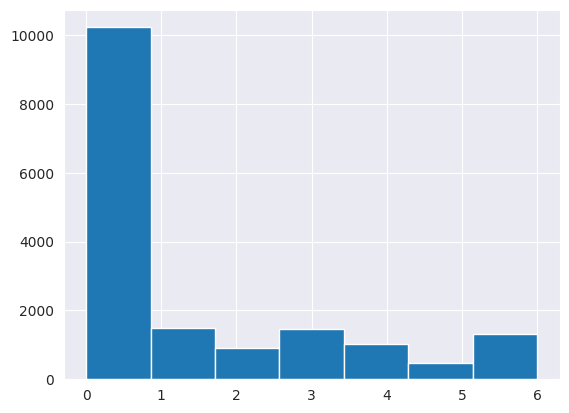

In [ ]:
data['thread_dayofweek'].hist(range=(0,6), bins=7);

In [ ]:
print('Чаще всего пользователи отвечают в понедельник, реже всего в субботу')

Чаще всего пользователи отвечают в понедельник, реже всего в субботу


### Самые активные пользователь

In [ ]:
user_mgs = data.pivot_table(index='user', values='client_msg_id', aggfunc=('count')).reset_index()
user_mgs.columns=['user', 'count_msg']
user_mgs = user_mgs.sort_values(by='count_msg', ascending=False)

In [ ]:
print('Самый активный пользователь по количеству сообщений:', user_mgs['user'].head(1).values[0])

Самый активный пользователь по количеству сообщений: U03F5HNG351


In [ ]:
print('Самый активный пользователь по количеству сообщений из следующих когорт:', data[(data['user'] == 'U02APGPE54P')]['cohort_name'].unique())

Самый активный пользователь по количеству сообщений из следующих когорт: ['59b' '10' '49' '57']


In [ ]:
user_react = data.pivot_table(index='user', values='reactions_count', aggfunc=('sum')).reset_index()
user_react.columns=['user', 'reactions_sum']
user_react = user_react.sort_values(by='reactions_sum', ascending=False)

In [ ]:
print('Самый активный пользователь по количеству реакций:', user_react['user'].head(1).values[0])

Самый активный пользователь по количеству реакций: U02PLR8QYT0


In [ ]:
print('Самый активный пользоателей по количеству реакций из следующих когорт:', data[(data['user'] == 'U02PLR8QYT0')]['cohort_name'].unique())

Самый активный пользоателей по количеству реакций из следующих когорт: ['Нет' '59b' '60' '02' '03' '04' '05' '08']


### Медианные и средние значения активности пользователей

<Axes: >

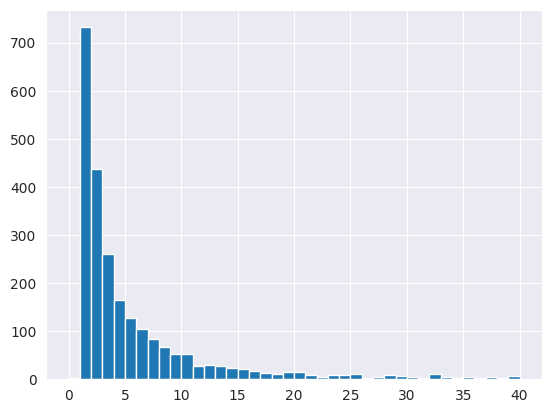

In [ ]:
user_mgs['count_msg'].hist(range=(0,40), bins=40)

<Axes: >

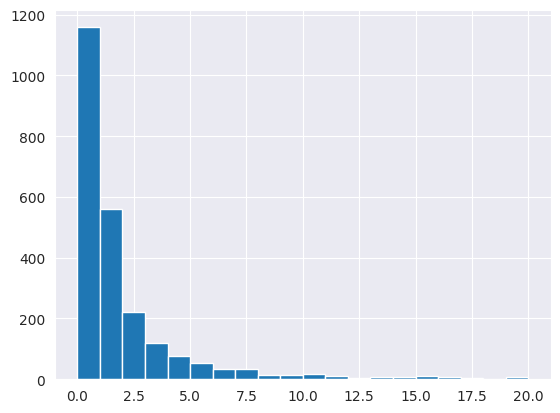

In [ ]:
user_react['reactions_sum'].hist(range=(0,20), bins=20)

In [ ]:
print('Медианное количество сообщений на пользователя:', round(user_mgs['count_msg'].median()))
print('Среднее количество сообщений на пользователя:', round(user_mgs['count_msg'].mean()))

Медианное количество сообщений на пользователя: 3
Среднее количество сообщений на пользователя: 7


In [ ]:
print('Медианное количество реакций на пользователя:', round(user_react['reactions_sum'].median()))
print('Среднее количество реакций на пользователя:', round(user_react['reactions_sum'].mean()))

Медианное количество реакций на пользователя: 1
Среднее количество реакций на пользователя: 4


### Сегментация пользователей

In [ ]:
users_segment = user_mgs.merge(user_react, how='inner', on='user')
users_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           2460 non-null   object
 1   count_msg      2460 non-null   int64 
 2   reactions_sum  2460 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.9+ KB


In [ ]:
#Функция для сегментирования пользователей
def segmentation (data):
    if data['count_msg'] < 3 and data['reactions_sum'] < 1:
        return 'Читатель'
    elif data['count_msg'] >= 3 and data['count_msg'] <=7 and data['reactions_sum'] == 0:
        return 'Пишет, но не использует реакции'
    elif data['reactions_sum'] >= 1 and data['reactions_sum'] <=4 and data['count_msg'] == 0:
        return 'Использует реакции, но не пишет'
    elif data['count_msg'] >7 and data['reactions_sum'] <4:
        return 'Активно пишет'
    elif data['count_msg'] >7 and data['reactions_sum'] == 0:
        return 'Активно пишет, не использует реакции'
    elif data['reactions_sum'] >4 and data['count_msg'] <7:
        return 'Активно использует реакции'
    elif data['reactions_sum'] >4 and data['count_msg'] == 0:
        return 'Активно использует реакции, не пишет'
    elif data['reactions_sum'] >4 and data['count_msg'] >7:
        return 'Активно использует реакции и активно пишет сообщения'
    elif data['count_msg'] >= 3 and data['count_msg'] <=7 and data['reactions_sum'] >= 1 and data['reactions_sum'] <=4:
        return 'Пишет и использует реакции'
    else:
        return 'Не определен'

In [ ]:
users_segment['segment'] = users_segment.apply(segmentation, axis=1)

In [ ]:
data = data.merge(users_segment, how='inner', on='user')

In [ ]:
data = data.drop(['count_msg', 'reactions_sum'], axis=1)

In [ ]:
data[data['segment'] == 'Читатель']['segment'].count()

1056

In [ ]:
data[data['segment'] == 'Пишет, но не использует реакции']['segment'].count()

1398

In [ ]:
data[data['segment'] == 'Использует реакции, но не пишет']['segment'].count()

0

In [ ]:
data[data['segment'] == 'Активно пишет']['segment'].count()

3850

In [ ]:
data[data['segment'] == 'Активно пишет, не использует реакции']['segment'].count()

0

In [ ]:
data[data['segment'] == 'Активно использует реакции']['segment'].count()

259

In [ ]:
data[data['segment'] == 'Активно использует реакции, не пишет']['segment'].count()

0

In [ ]:
data[data['segment'] == 'Активно использует реакции и активно пишет сообщения']['segment'].count()

8402

In [ ]:
data[data['segment'] == 'Пишет и использует реакции']['segment'].count()

1557

In [ ]:
data[data['segment'] == 'Не определен']['segment'].count()

1348

## Выводы по итогам анализа



*   В каналах тематики 'project' наибольшее количество сообщений.
>   *Можно предположить, что это связано с тем, что проектные работы у студентов вызывают вопросы, которые они задают предподавателям в каналах этой темы.*
*   В каналах тематики 'students-feedback' меньше всего сообщений.
>   *Можно предположить, что это связано с тем, что студенты не хотят тратить время на обратную связь*
*   В когорте '59' больше всего сообщений, наименьше же количество сообщений в когорте '81'.
>   *Можно предположить, что чем старше когорта, тем активнее пользователи, следовательно больше сообщений*
*   В каналах тематики 'info' больше всего реакций.
>   *Тематика канала, информирование. Следовательно, реакциями студенты отмечают интересные новости и отмечают, что сообщение ими прочитано*
*   В каналах тематики 'students-feedback' меньше всего реакций.
>   *Канал с обратной связью для студентов, реакции использовать при подаче обратной связи не имеет смысла*
*   В когорте '59' больше всего реакций, нет ни одной реакциий на сообщения в когортах '2, 1, 3, 38, 4'.
>   *Можно предположить, что в когортах, где нет реакций мессенджеры не поддерживают/не поддерживали эту функцию*
*   Заметна явная корреляция между длиной текста и количеством слов (0.96), также высокая прямая корреляция наблюдается между длиной текста/количеством слов и количеством добавляемых файлов (0,25 и 0,68). Корреляция между реакциями и добавляемымии файлами отсутсвует, равно 0. При этом длина текста/количество слов влияют на количество реакций, корелляции равны 0,2 и 0,47.
*   Быстрее всего студенты отвечают в каналах тематики 'group_orange'. Дольше всего ответы поступают в каналах тематики 'apps'
*   Быстрее всего студенты отвечают в когорте '54'. Дольше всего ответы поступают в когорте '44'
*   Активней всего студенты пишут сообщения в тредах в понедельник (более 80%), начало спринтов, реже всего студентам охота писать сообщения в тредах в субботу.
*   Самым активным пользователем по количеству сообщений является 'U03F5HNG351' из когорт '59b, 10, 49, 57'.
*   Самым активным пользователем по количеству реакий является 'U02PLR8QYT0' из когорт '60, 03, 04, 08'
*   Медианное и среднее количество сообщений на пользователя равно 3 и 7 соответственно.
*   Медианное и среднее количество реакций на пользователя равно 1 и 4 соответствено.
*   Сегментировав пользователей по количеству сообщений и реакций на группы имеем следующий результат: 
    *   'Читатель' - 1056
    *   'Пишет, но не использует реакции' - 1398
    *   'Использует реакции, но не пишет' - 0
    *   'Активно пишет' - 3850
    *   'Активно пишет, не использует реакции' - 0
    *   'Активно использует реакции' - 259
    *   'Активно использует реакции, не пишет' - 0
    *   'Активно использует реакции и активно пишет сообщения' - 8402
    *   'Пишет и использует реакции' - 1557
    *   'Не определен' - 1348
